# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [10]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [11]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/abtest.csv')

df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [48]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [49]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [80]:
df.shape

(100, 6)

In [81]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


The mean time spent on the landing page is 5.38 minutes and the median is close at 5.42 minutes

There are no missing values or duplicates

### Univariate Analysis

Text(0, 0.5, 'Count')

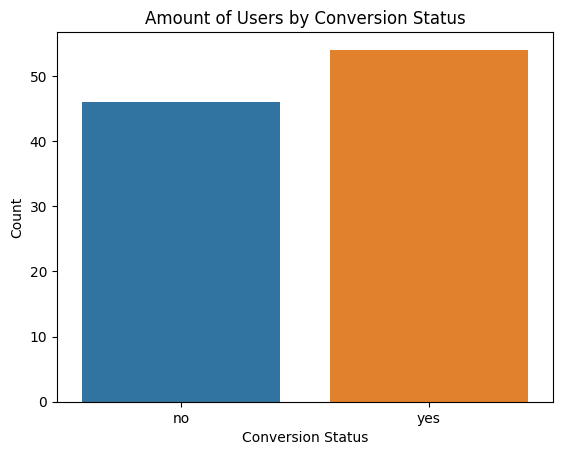

In [82]:
sns.countplot(data = df, x = 'converted')
plt.title("Amount of Users by Conversion Status")
plt.xlabel("Conversion Status")
plt.ylabel("Count")

There are a higher number of converted users than non converted users

Text(0, 0.5, 'Count')

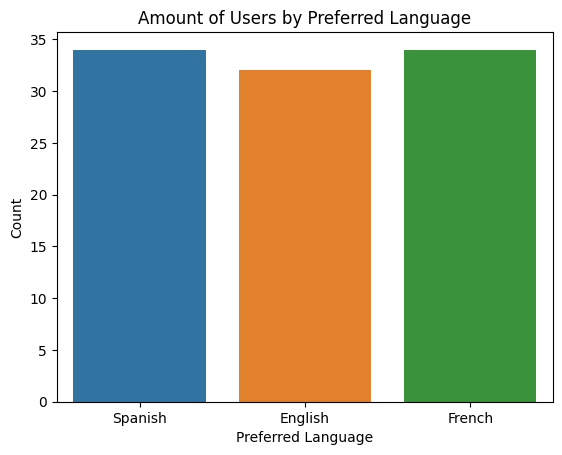

In [78]:
sns.countplot(data = df, x = 'language_preferred')
plt.title("Amount of Users by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Count")

Spanish and French have the highest number of users with English trailing not too far behind.

### Bivariate Analysis

Text(0, 0.5, 'Time Spent on the Page')

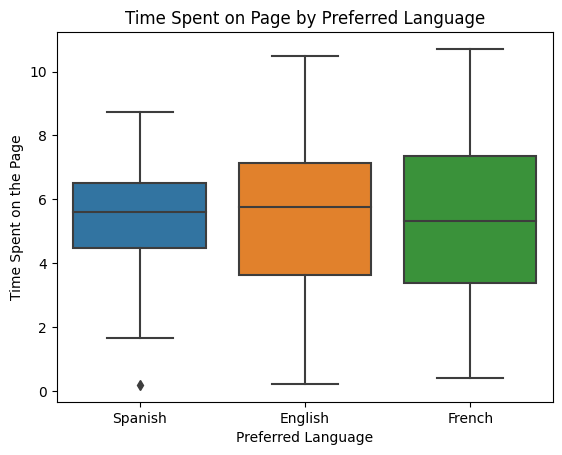

In [77]:
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.title("Time Spent on Page by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Time Spent on the Page")

The distributions of the mean time spent on the landing page by language are similar but different in many ways as well. The median for all the three are close together but the IQR for all three is different. Spanish has one outlier.

Text(0, 0.5, 'Time Spent on the Page')

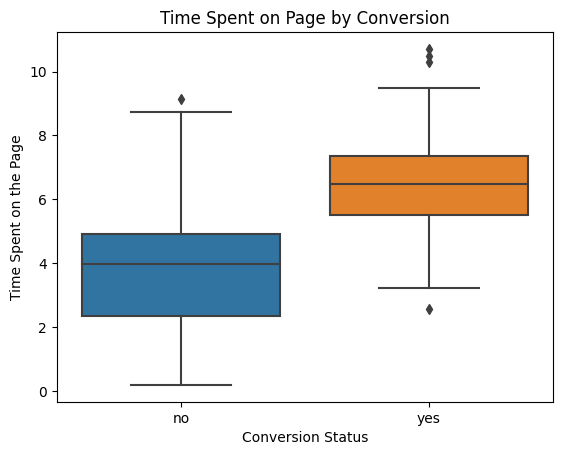

In [76]:
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.title("Time Spent on Page by Conversion")
plt.xlabel("Conversion Status")
plt.ylabel("Time Spent on the Page")

The median time spent on the landing page is higher for those that converted than those that didn't by a strikingly large amount.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

Text(0, 0.5, 'Time Spent on the Page')

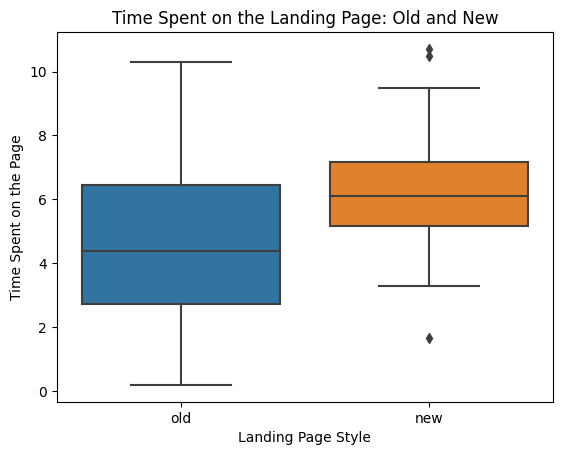

In [74]:
sns.boxplot(data=df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.title("Time Spent on the Landing Page: Old and New")
plt.xlabel("Landing Page Style")
plt.ylabel("Time Spent on the Page")

The distributions for time spent each landing page style are different. The median for the new landing page is much higher than that of the old landing page and IQR is much more narrow.

### Step 1: Define the null and alternate hypotheses

let $\mu_1$ be the mean time for users of the old landing page and $\mu_2$ be the mean time for users of the new landing page. For the null hypothesis, we assume that the means for the two populations are the same. For the alternative hypothesis, we propose that the mean time for users of the new landing page is new.

$H_0: μ_1 = μ_2$

$H_A: \mu_1 < μ_2$

### Step 2: Select Appropriate test

The test for this would be a two sample independent t-test and we can see that based on the how the assumptions for this test are met below:

Assumptions:


*   Continuous data: the time spent on the landing page is a continuous measure
*   Normally distributed populations: the populations are normally distributed

*   Independently sampled: This condition is tricky. Although there was only one sample collected, the groups were created independently
*   Unequal population standard deviations: because the sample standard deviations are unequal, we can assume the population standard deviations are unequal as  

* Random sampling: The sample is randomly sampled from the population   







### Step 3: Decide the significance level

The significance level or $α$ value is set at 5%

### Step 4: Collect and prepare data

In [ ]:
#See below cells

### Step 5: Calculate the p-value

In [16]:
from scipy.stats import ttest_ind

In [60]:
#This code organizes the landing pages as their own 'columns' so that the data is easier to pass through the t-test function
old_landing_page = []
new_landing_page = []
index_number = 0
for i in df['landing_page']:
  if i == 'old':
    old_landing_page.append(df['time_spent_on_the_page'][index_number])
  else:
    new_landing_page.append(df['time_spent_on_the_page'][index_number])
  index_number += 1

old_landing_page = np.array(old_landing_page)
new_landing_page = np.array(new_landing_page)

print("The standard deviation for time spent on the old landing page is " + str(old_landing_page.std()) + " minutes")
print("The standard deviation for time spent on the new landing page is " + str(new_landing_page.std()) + " minutes")

test_stat, p_value = ttest_ind(new_landing_page, old_landing_page, equal_var = False, alternative = 'greater')
print ("The p-value is " + str(p_value))

The standard deviation for time spent on the old landing page is 2.556024694716387 minutes
The standard deviation for time spent on the new landing page is 1.7987689568146321 minutes
The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

The p-value that is calculated from the two-sample independent t-test is .01% which is much smaller than our predetermined α value of 5%. Therefore, we can reject the null hypothesis and say that users spend a significantly higher time on the new landing page than the old one.

### Step 7:  Draw inference

From this information, we infer that the new landing page for the news website does a better job at keeping users engaged in the platform.



**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis


### Step 1: Define Null and Alternative Hypotheses

lets say $p_1$ is the proportion of converts that used the old landing page and that $p_2$ is the proportion of converts that used the new landing. For the null hypothesis, we say that the two proportions are the same. For the alternative hypothesis, we say that the propotion of converts that used the new landing page is higher than the proportion of converts that used the old landing page. It should look like the following:

>$H_0: p_1 = p_2$

>$H_A: p_1 < p_2$

### Step 2: Select Appropriate Test

For this question we select a two proportion z - test. The assumptions have been met as seen below:



*   Binomally distributed population: Yes, a person either converted or didn't
*   Random sampling from population: This condition was met

*   List item






### Step 3: Decide the significance value

For the significance value or $α$ value, we have decided on 5%.

## Steps 4 and 5: Collect and prepare data for finding the P-Value

In [68]:
from statsmodels.stats.proportion import proportions_ztest
old_landing_page_converts = 0
new_landing_page_converts = 0
index_number = 0
for i in df['landing_page']:
  if i == 'old':
    if df['converted'][index_number] == 'yes':
      old_landing_page_converts += 1
  else:
    if df['converted'][index_number] == 'yes':
      new_landing_page_converts += 1

  index_number += 1

convert_count = np.array([old_landing_page_converts,new_landing_page_converts])

sample_size = np.array([50,50])

test_statistic, p_value = proportions_ztest(convert_count, sample_size)
print("The p-value is " + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare P-Value with $α$

The p-value that was calculated above is 1.61% which is smaller than the decided level of 5%. This means that we reject the null hypothesis and say that the proportion the

### Step 7: Draw inference

From the rejection of the null hypothesis above, we can infer that the new landing page leads to a higher number of converts.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

### Step 1: Define Null and Alternative Hypotheses


For this question, the null hypothesis would be that conversion and preferred language are not related and the alternative would be that the two are related.

>$H_0:$ Conversion and preferred language are not related

>$H_A:$ Conversion ad preferred language are related

### Step 2: Select Appropriate Test

For this question, the best test would be a Chi Square test of Independence.

Assumptions:


*   Categorical variables: Yes, we are looking at two categorical variables
*   Expected values at least 5: Yes, the expected values are at least five

*  Random sampling from population: Yes, the sample from the population is random






### Step 3: Decide the significance value

The significance value, or $α$, for this test is set at 5%.

### Steps 4 and 5: Collect and prepare data for finding the P-Value

In [69]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df.language_preferred, df.converted)

chistat, p_value, dof, expected = chi2_contingency(ct)
print("The p-value is " + str(p_value))


The p-value is 0.2129888748754345


### Step 6: Compare P-value with $α$

Since the p-value calculated above is 21%, which is quite large, we have no choice but to accept the null hypothesis and say that conversion and language preferred are not related.

### Step 7: Draw Inference

From the acceptance of the null hypothesis above, we can infer that there is no effect of language on whether or not somebody converts to a subscription to the news service.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

### Step 1: Define Null and Alternative Hypotheses

Since we are looking at three different languages in the data set (English, Spanish, and French), let $μ_1$ be the mean time spent on the landing page for English users, $μ_2$ be the mean time spent on the page for Spanish users, and $μ_3$ be the mean time spent on the page for French users. The null hypothesis would be that the mean times for all three languages are the same and the alternative hypothesis would be that at least one of these is different.

>$H_0: μ_1 = μ_2 = \mu_3$

>$H_A:$ At least one set of language users spends more time on the page than the others

### Step 2 Select Appropriate Test

For this question, the most appropriate test would be an ANOVA test since we are comparing more than two means

Assumptions:


*   The Shapiro Wilks condition for normality is shown below and has been met
*   The Levene condition for equality of variances is shown below and has been met



In [50]:
from scipy.stats import shapiro

w, p_value = shapiro(df['time_spent_on_the_page'])
print(p_value)

0.5643193125724792


In [52]:
from scipy.stats import levene

levene_stat, p_value = levene(df['time_spent_on_the_page'][df['language_preferred'] =='English'],
                              df['time_spent_on_the_page'][df['language_preferred'] =='Spanish'],
                              df['time_spent_on_the_page'][df['language_preferred'] =='French'])
print(p_value)

0.06515086840327314


### Step 3: Decide Significance Value

The significance value, or $α$, for this test is 5%

### Steps 4 and 5: Collect and Prepare data for finding the P-Value

In [72]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'])

print("The p-value is " + str(p_value))

The p-value is 0.8665610536012648


### Step 6: Compare P-Value with $α$

The p-value calculated above is 86%, which is incredibly high. Therefore, we can undoubtedly accept the null hypothesis and say that the mean time spent on the landing page is the same for all languages.

### Step 7: Draw Inference

Because of our acceptance of the null hypothesis above, we can say infer that language has no effect on the time spent on the landing page.

## Conclusion and Business Recommendations

To conclude our exploration into the news site, we can say, using evidence from our tests above that the new landing page significantly impacts whether or not a user makes a decision to subscribe or not. However, despite this statistically significant change to the subscription rate, we can also see that language is not a factor, since there is no significant relationship that language has to anything. Therefore, the business recommendation would be to continue the trend of making the landing page more appealing to users in the same fashion as they did before.

___